In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

In [2]:
# MNIST veri setini yükleme
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train[..., tf.newaxis] / 255.0  # Normalize etme
x_test = x_test[..., tf.newaxis] / 255.0

In [3]:
# Klasik CNN modelini oluşturma
def create_classical_model():
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))
    return model

In [4]:
# Modeli oluşturma
classical_model = create_classical_model()

# Modeli derleme
classical_model.compile(optimizer='adam',
                        loss='sparse_categorical_crossentropy',
                        metrics=['accuracy'])

# Modeli eğitme
history = classical_model.fit(x_train, y_train,
                              epochs=5,
                              batch_size=32,
                              validation_split=0.1)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 60s 34ms/step - accuracy: 0.8923 - loss: 0.3485 - val_accuracy: 0.9848 - val_loss: 0.0512
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 73s 29ms/step - accuracy: 0.9843 - loss: 0.0497 - val_accuracy: 0.9842 - val_loss: 0.0512
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 84s 30ms/step - accuracy: 0.9891 - loss: 0.0343 - val_accuracy: 0.9892 - val_loss: 0.0404
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 49s 29ms/step - accuracy: 0.9926 - loss: 0.0254 - val_accuracy: 0.9903 - val_loss: 0.0344
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 49s 29ms/step - accuracy: 0.9932 - loss: 0.0210 - val_accuracy: 0.9910 - val_loss: 0.0341


In [5]:
# Modeli değerlendirme
test_loss, test_acc = classical_model.evaluate(x_test, y_test, verbose=2)
print(f'Test Accuracy: {test_acc}')
print(f'Test Loss: {test_loss}')

# Eğitim ve doğrulama doğruluğunu ve kaybını görselleştirme
plt.figure(figsize=(12, 5))

313/313 - 2s - 8ms/step - accuracy: 0.9924 - loss: 0.0280
Test Accuracy: 0.9923999905586243
Test Loss: 0.027996139600872993


<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

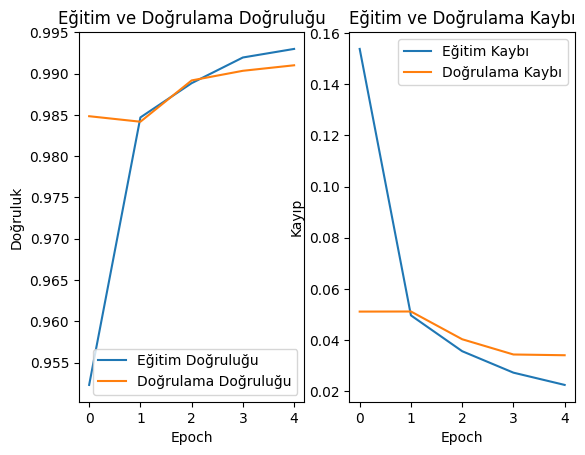

In [6]:

# Eğitim doğruluğu
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Eğitim Doğruluğu')
plt.plot(history.history['val_accuracy'], label='Doğrulama Doğruluğu')
plt.xlabel('Epoch')
plt.ylabel('Doğruluk')
plt.legend(loc='lower right')
plt.title('Eğitim ve Doğrulama Doğruluğu')

# Eğitim kaybı
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Eğitim Kaybı')
plt.plot(history.history['val_loss'], label='Doğrulama Kaybı')
plt.xlabel('Epoch')
plt.ylabel('Kayıp')
plt.legend(loc='upper right')
plt.title('Eğitim ve Doğrulama Kaybı')

plt.show()